# Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [2]:
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.decomposition import PCA

In [5]:
import cbell
from functools import reduce


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
#conda install -c conda-forge cufflinks-py
#conda install plotly
import ipywidgets as wg
from IPython.display import display
import pandas as pd 
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import inspect

init_notebook_mode(connected=True)
cf.go_offline()

In [10]:
original = pd.read_csv("data/UniversityData.csv", index_col="UnitID")

In [11]:
original.dropna(subset=[original.columns[32]], inplace=True)

In [12]:
institution_names = original[["Institution Name"]].reset_index()

## 1) Subset my Data into smaller dfs that make for good principle components

In [13]:
df = pd.read_csv("data/cleaned_df.csv", index_col=["UnitID"])

In [14]:
df.columns[1:14]

Index(['Tuition_And_Fees', 'Government_Grants', 'Private_Gifts',
       'Investment_Return', 'Sales_And_Services', 'Other_Revenues',
       'Tuition_And_Fees_As_Dollar_Amount',
       'Government_Grants_As_Dollar_Amount', 'Private_Gifts_As_Dollar_Amount',
       'Investment_Return_As_Dollar_Amount',
       'Sales_And_Services_As_Dollar_Amount',
       'Other_Revenues_As_Dollar_Amount', 'Core_Expenses'],
      dtype='object')

In [15]:
df.head(3)

,Core_Revenues,Tuition_And_Fees,Government_Grants,Private_Gifts,Investment_Return,Sales_And_Services,Other_Revenues,Tuition_And_Fees_As_Dollar_Amount,Government_Grants_As_Dollar_Amount,Private_Gifts_As_Dollar_Amount,...,State abbreviation (HD2018)_Vermont,State abbreviation (HD2018)_Virgin Islands,State abbreviation (HD2018)_Virginia,State abbreviation (HD2018)_Washington,State abbreviation (HD2018)_West Virginia,State abbreviation (HD2018)_Wisconsin,State abbreviation (HD2018)_Wyoming,State abbreviation (HD2018)_isMissing,Graduation rate total cohort (DRVGR2019),Graduation rate Black non-Hispanic (DRVGR2019)
UnitID,,,,,,,,,,,,,,,,,,,,,
180203.0,7078959.0,2.0,60.0,7.0,1.0,0.0,29.0,141579.18,4247375.40,495527.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,NaN
138558.0,70491879.0,17.0,17.0,2.0,0.0,0.0,28.0,11983619.43,11983619.43,1409837.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,12.0
126182.0,52099218.0,34.0,51.0,5.0,1.0,0.0,9.0,17713734.12,26570601.18,2604960.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,17.0


 ### Revenues and Expenses Principle components

In [18]:
revenues_distribution = df.iloc[:,1:7] #Revenues distribution (percentages of total revenues to each area)
revenues_dollar_amount = df.iloc[:,7:13]

expenses_distribution = df.iloc[:,13:21] #Expenses as a distribution
expenses_dollar_amount = df.iloc[:, 21:28]

staff_total = df.iloc[:,29:58] #add feature: staff diversity distribution score
staff_diversity_distribution = df.iloc[:, 58:87]

enrollment_diversity = df.iloc[:,87:100] #Enrollment distribution

# Age as principle component

In [19]:
age_df = df.iloc[:, 100:107]

In [20]:
age_df.head(3)

,Grand total (EF2013B_RV Undergraduate Age under 25 total),Total men (EF2013B_RV Undergraduate Age under 25 total),Total women (EF2013B_RV Undergraduate Age under 25 total),Grand total (EF2013B_RV Undergraduate Age 25 and over total),Total men (EF2013B_RV Undergraduate Age 25 and over total),Total women (EF2013B_RV Undergraduate Age 25 and over total),Incoming_Class_Grand_Total
UnitID,,,,,,,
180203.0,75.0,31.0,44.0,64.0,29.0,35.0,139.0
138558.0,2877.0,1389.0,1488.0,517.0,163.0,354.0,3394.0
126182.0,1803.0,946.0,857.0,481.0,187.0,294.0,2284.0


In [21]:
age_distribution = df.iloc[:, 107:113]

# ACT/SAT Scores a principle component

In [22]:
test_scores = df.iloc[:,115:118]

In [23]:
test_scores.head()

,SAT Critical Reading 75th percentile score (IC2012_RV),SAT Math 75th percentile score (IC2012_RV),ACT Composite 75th percentile score (IC2012_RV)
UnitID,,,
180203.0,608.0,548.0,25.4
138558.0,420.0,410.0,17.0
126182.0,530.0,550.0,23.0
100654.0,455.0,460.0,19.0
100724.0,460.0,480.0,19.0


## Merging important categorical variables into one column

In [24]:
df_pre = pd.read_csv("data/pre_dummies.csv", index_col="UnitID").drop("Unnamed: 0", axis=1)

In [25]:
df_pre = pd.get_dummies(df_pre, drop_first=False)

In [26]:
itr = KNNImputer()

In [27]:
EDA_df = df_pre.copy(deep=True)

In [28]:
EDA_df.loc[:,:] = itr.fit_transform(df_pre)

In [29]:
EDA_df.columns

Index(['Core_Revenues', 'Tuition_And_Fees', 'Government_Grants',
       'Private_Gifts', 'Investment_Return', 'Sales_And_Services',
       'Other_Revenues', 'Tuition_And_Fees_As_Dollar_Amount',
       'Government_Grants_As_Dollar_Amount', 'Private_Gifts_As_Dollar_Amount',
       ...
       'State abbreviation (HD2018)_Texas', 'State abbreviation (HD2018)_Utah',
       'State abbreviation (HD2018)_Vermont',
       'State abbreviation (HD2018)_Virgin Islands',
       'State abbreviation (HD2018)_Virginia',
       'State abbreviation (HD2018)_Washington',
       'State abbreviation (HD2018)_West Virginia',
       'State abbreviation (HD2018)_Wisconsin',
       'State abbreviation (HD2018)_Wyoming',
       'State abbreviation (HD2018)_isMissing'],
      dtype='object', length=275)

In [30]:
cc_basic = []
for i in EDA_df.columns:
    if "Carnegie Classification 2018: Basic" in i:
        cc_basic.append(i)
        
cc_size = []
for i in EDA_df.columns:
    if "Carnegie Classification 2018: Size" in i:
        cc_size.append(i)
        
sector = []
for i in EDA_df.columns:
    if "Sector of institution" in i:
        sector.append(i)
        
state = []
for i in EDA_df.columns:
    if "State abbreviation" in i:
        state.append(i)

### Make mini data frame from Carnegie Classification, Sector and State, which seem to be the most important categorical variables

In [31]:
def merge_into_mini(dframe, list_of_cols, final_col_name):
    df_list = []
    for i in list_of_cols:
        df_1 = pd.DataFrame(dframe.copy(deep=True)[i])
        df_1.reset_index(inplace=True)
        df_1.dropna(inplace=True)
        df_1.columns = ["UnitID", final_col_name]
        df_list.append(df_1)
    df_final = pd.concat(df_list)
    return df_final

In [32]:
cc_df = EDA_df.loc[:, cc_basic]
for i in cc_df.columns:
    cc_df[i] = cc_df[i].replace({0.0: np.nan, 1.0: i.split("_")[1]})
cc_df = cbell.merge_into_mini(cc_df, cc_basic, "Carnegie_Classification_Basic")

In [33]:
cc_size_df = EDA_df.loc[:, cc_size]
for i in cc_size_df.columns:
    cc_size_df[i] = cc_size_df[i].replace({0.0: np.nan, 1.0: i.split("_")[1]})
cc_size_df = cbell.merge_into_mini(cc_size_df, cc_size, "Carnegie_Classification_Size_Setting")

In [34]:
sector_df = EDA_df.loc[:, sector]
for i in sector_df.columns:
    sector_df[i] = sector_df[i].replace({0.0: np.nan, 1.0: i.split("_")[1]})
sector_df = cbell.merge_into_mini(sector_df, sector, "Sector")

In [35]:
state_df = EDA_df.loc[:, state]
for i in state_df.columns:
    state_df[i] = state_df[i].replace({0.0: np.nan, 1.0: i.split("_")[1]})
state_df = cbell.merge_into_mini(state_df, state, "State")

In [36]:
df_list = [institution_names, cc_df, sector_df, cc_size_df, state_df, df]

In [37]:
df_explore = reduce(lambda x, y: pd.merge(x, y, on = 'UnitID', how="outer"), df_list).set_index("UnitID")

In [38]:
cols = df_explore.columns

In [39]:
df_explore.to_csv("data/feature_engineer.csv")

### Train test split

In [50]:
black_grad_rates_df = df.loc[:,:].dropna(subset=[df.columns[-1]])

In [51]:
x1 = df.loc[:,:].drop([df.columns[-1], df.columns[-2]], axis=1)
y1 = df.loc[:,df.columns[-2]]
x2 = black_grad_rates_df.drop(df.columns[-2:], axis=1)
y2 = black_grad_rates_df.loc[:,df.columns[-2]]

# Model For Predicting African American Graduation Rates

## initial Modeling

In [93]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.1, random_state=42)

In [94]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", Lasso(alpha=0.1))   
])

In [95]:
pipeline.fit(x2_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', Lasso(alpha=0.1))])

In [96]:
y2_pred = pipeline.predict(x2_test)

In [97]:
mean_squared_error(y2_test, y2_pred)

91.77491535143967

In [98]:
#visualizing a few of the coeficients
names = list(x1.columns)
lasso_coef = pipeline.named_steps['classifier'].coef_
coef_dict = dict(zip(names, lasso_coef))


#_ = plt.plot(range(stop-start), lasso_coef[start:stop])
#_ = plt.xticks(range(stop-start), names[start:stop], rotation=90)
#_ = plt.ylabel("Coeficients")
#plt.show()

sorted_coefs = sorted(coef_dict.items(), key=lambda item: item[1])



In [99]:
important_black = sorted_coefs[:5] + sorted_coefs[-6:]

In [150]:
important_black

[('Government_Grants', -2.4491123758239586),
 ('Parent/child indicator - Finance (FLAGS2019)_Partial child record - reports revenues/expenses. Assets/liabilties reported with parent',
  -1.9565954231970981),
 ('Grand total (EF2013B_RV  Undergraduate  Age 25 and over total)',
  -1.7908399990571056),
 ("Carnegie Classification 2018: Basic (HD2018)_Baccalaureate/Associate's Colleges: Associate's Dominant",
  -1.6203838544457425),
 ('Percent of total enrollment that are Black or African American (DRVEF2013_RV)',
  -1.4882309149707666),
 ('Total women (EF2013B_RV  Undergraduate  Age under 25 total)_as_percentage',
  1.382825075427221),
 ('Percent of total enrollment that are Asian (DRVEF2013_RV)',
  1.418469696964663),
 ('Total price for out-of-state students living on campus 2012-13 (DRVIC2012_RV)',
  1.9255905382801144),
 ('ACT Composite 75th percentile score (IC2012_RV)', 2.4144651572255267),
 ('Research_Expenses', 2.4721039502053412),
 ('SAT Math 75th percentile score (IC2012_RV)', 2.82

## Feature Engineering Adding Principle Components

In [101]:
# First scale x2 using standard scaler

In [102]:
standard_scaler = StandardScaler()

In [103]:
x2_scaled = standard_scaler.fit_transform(x2)

In [104]:
pca_transform = PCA(n_components=1)

In [105]:
x2_df = pd.DataFrame(x2_scaled, columns=x2.columns)

In [106]:
x2_df["Revenues_Dist_PC"] = pca_transform.fit_transform(x2_df[revenues_distribution.columns])

In [107]:
x2_df["Revenues_Dollar_Amount_PC"] = pca_transform.fit_transform(x2_df[revenues_dollar_amount.columns])

In [108]:
x2_df["Expenses_Dollar_Amount_PC"] = pca_transform.fit_transform(x2_df[expenses_dollar_amount.columns])

In [109]:
x2_df["Expenses_Dist_PC"] = pca_transform.fit_transform(x2_df[expenses_distribution.columns])

In [110]:
x2_df["Staff_Total_PC"] = pca_transform.fit_transform(x2_df[staff_total.columns])

In [111]:
x2_df["Staff_Dist_PC"] = pca_transform.fit_transform(x2_df[staff_diversity_distribution.columns])

In [112]:
x2_df["Age_Total_PC"] = pca_transform.fit_transform(x2_df[age_df.columns])

In [113]:
x2_df["Age_Dist_PC"] = pca_transform.fit_transform(x2_df[age_distribution.columns])

In [114]:
x2_df["Enrollment_Diversity_PC"] = pca_transform.fit_transform(x2_df[enrollment_diversity.columns])

In [115]:
x2_df["Test_Scores_PC"] = pca_transform.fit_transform(x2_df[test_scores.columns])

# modeling with new Principle Components

In [116]:
#this will remove correlated features but very slow operation
def calculate_vif_(X, thresh):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]
               

In [117]:
# Removing collinearity with heat map

In [118]:
cor_matrix = x2_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
x2_df2 = x2_df.drop(to_drop, axis=1)
x2_df2.head()

,Core_Revenues,Tuition_And_Fees,Government_Grants,Private_Gifts,Investment_Return,Sales_And_Services,Other_Revenues,Tuition_And_Fees_As_Dollar_Amount,Government_Grants_As_Dollar_Amount,Private_Gifts_As_Dollar_Amount,...,State abbreviation (HD2018)_Vermont,State abbreviation (HD2018)_Virgin Islands,State abbreviation (HD2018)_Virginia,State abbreviation (HD2018)_Washington,State abbreviation (HD2018)_West Virginia,State abbreviation (HD2018)_Wisconsin,State abbreviation (HD2018)_Wyoming,Revenues_Dist_PC,Expenses_Dist_PC,Enrollment_Diversity_PC
0,-0.240125,-1.414208,0.546006,-0.652707,-0.376851,-0.083876,2.141840,-0.420798,-0.178638,-0.180266,...,-0.080342,-0.022217,-0.167004,-0.162262,-0.10475,-0.143682,-0.0385,-2.232807,0.384783,-1.067222
1,-0.272440,-0.817798,3.394448,-0.410091,-0.293475,-0.083876,0.215821,-0.382968,-0.063176,-0.170589,...,-0.080342,-0.022217,-0.167004,-0.162262,-0.10475,-0.143682,-0.0385,-2.712093,-0.103036,-0.707113
2,-0.112532,-0.852881,1.635116,-0.652707,-0.376851,-0.083876,-0.088287,-0.188118,0.066345,-0.168505,...,-0.080342,-0.022217,-0.167004,-0.162262,-0.10475,-0.143682,-0.0385,-1.560533,1.855081,-0.985444
3,-0.126798,-0.958130,1.216228,-0.652707,-0.293475,-0.083876,0.013083,-0.232545,-0.006362,-0.169820,...,-0.080342,-0.022217,-0.167004,-0.162262,-0.10475,-0.143682,-0.0385,-1.421339,0.241813,-1.161492
4,-0.220337,-1.273876,2.137783,-0.652707,-0.376851,-0.083876,-0.291026,-0.386568,-0.040530,-0.178442,...,-0.080342,-0.022217,-0.167004,-0.162262,-0.10475,-0.143682,-0.0385,-2.050113,1.007857,-1.414404


In [139]:
x2_train2, x2_test2, y2_train2, y2_test2 = train_test_split(x2_df, y2, test_size=0.1, random_state=42)

In [140]:
lasso2 = Lasso(alpha=0.1)

In [141]:
lasso2.fit(x2_train2, y2_train2)

Lasso(alpha=0.1)

In [142]:
y2_pred2 = lasso2.predict(x2_test2)

In [143]:
mean_squared_error(y2_test2, y2_pred2)

89.85989699888353

### Grant Aid

In [141]:
df_explore[df_explore["Institution Name"].str.contains("Spelman")]["State"]

UnitID
141060    Georgia
Name: State, dtype: object

In [160]:
px.scatter(df_explore, x=names[0], y=names[-1], 
           animation_frame="Sector", hover_name="Institution Name",
           log_x=False, size_max=55, range_x=[0,100], range_y=[0,100])

The Coefficient for grant aid depends on various things:
<ul>
    <li>Basic Carnegie Classification</li>
    <li></li>

### SAT and ACT Scores

NameError: name 'names' is not defined

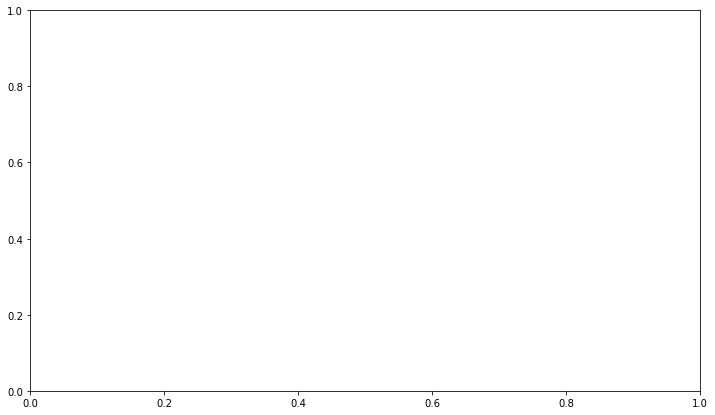

In [85]:
fig, ax = plt.subplots(figsize=(12,7))
_ = sns.regplot(
    data=df, x=names[5], 
    y=names[-1], robust=True,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)

plt.ylabel("Graduation Rate")
plt.xlabel("ACT Composite 75th percentile score")

In [86]:
px.scatter(df_explore, x=names[5], y=names[-1], animation_group="Carnegie_Classification_Size_Setting")

NameError: name 'df_explore' is not defined

## Price 

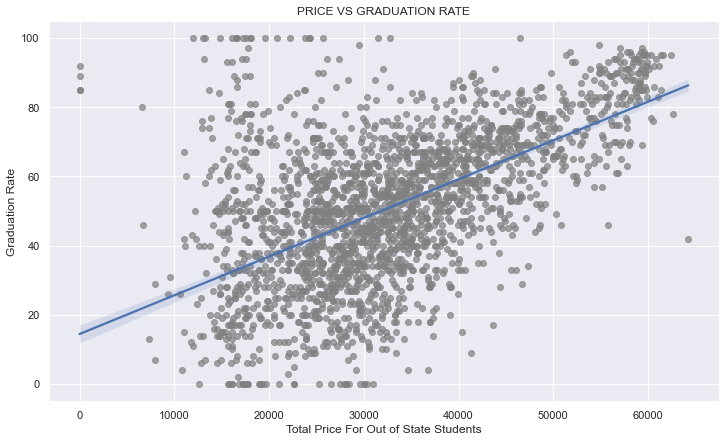

In [113]:
fig, ax = plt.subplots(figsize=(12,7))
_ = sns.regplot(
    data=df, x=names[3], 
    y=names[-1], robust=True,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)

plt.xlabel("Total Price For Out of State Students")
plt.ylabel("Graduation Rate")
plt.title("PRICE VS GRADUATION RATE")
plt.show()


## AGE

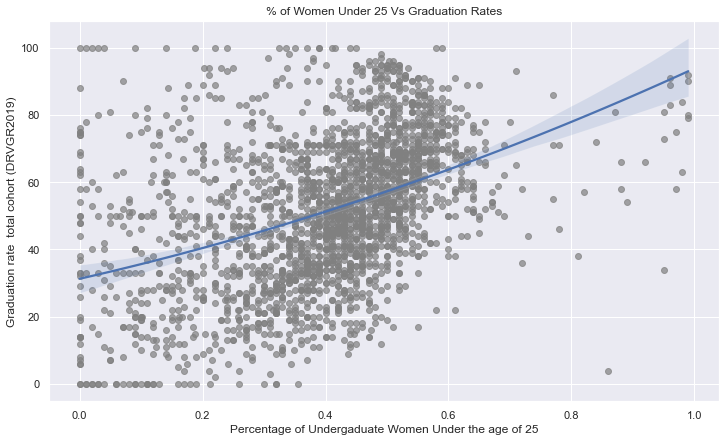

In [188]:
fig, ax = plt.subplots(figsize=(12,7))
_ = sns.regplot(
    data=df, x=names[1], 
    y=names[-1], order=2,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)
_ = plt.xlabel("Percentage of Undergaduate Women Under the age of 25")
_ = plt.title("% of Women Under 25 Vs Graduation Rates")

### Enrollment Diversity

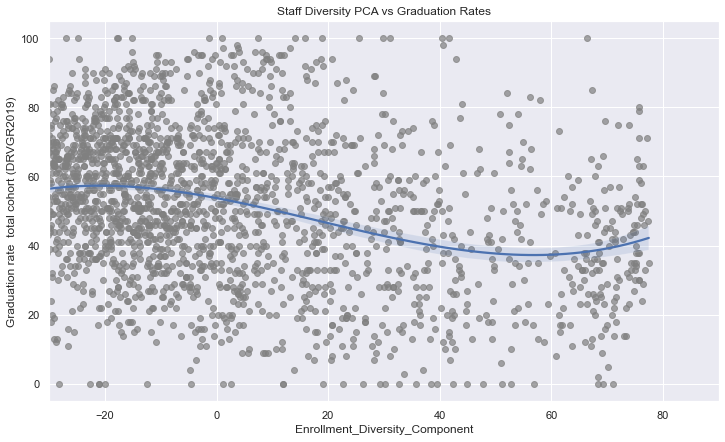

In [185]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,7))
_ = sns.regplot(
    data=df_explore, x=names[-2], 
    y=names[-1], order=3,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)
plt.xlim([-30, 90])
plt.title("Enrollment Diversity PCA vs Graduation Rates")

plt.show()

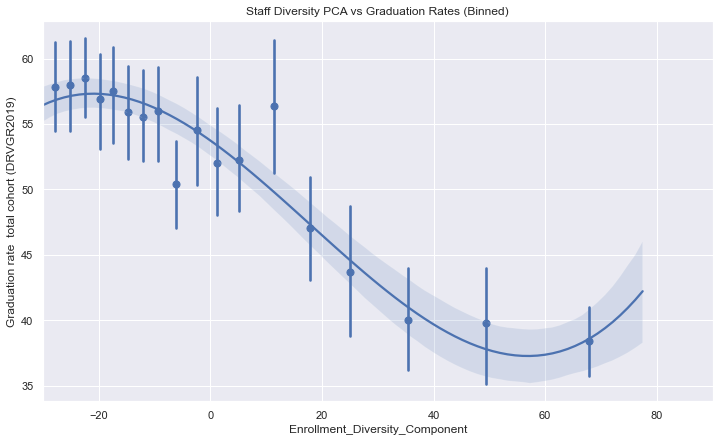

In [186]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,7))
_ = sns.regplot(
    data=df_explore, x=names[-2], 
    y=names[-1], x_bins=20, order=3,
)
plt.xlim([-30, 90])
plt.title("Enrollment Diversity PCA vs Graduation Rates (Binned)")

plt.show()

### Expenses

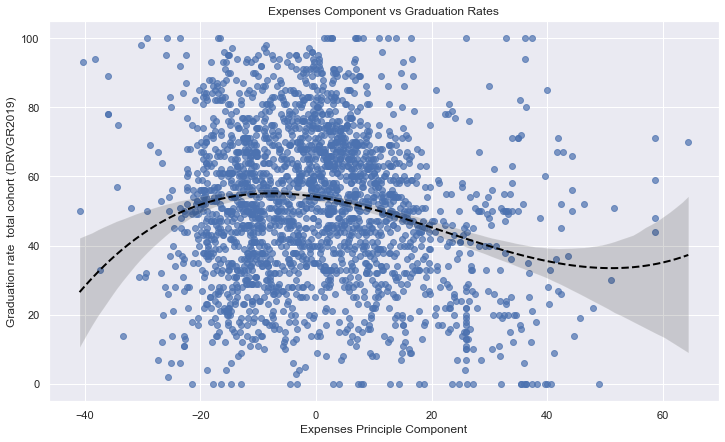

In [116]:
fig, ax = plt.subplots(figsize=(12,7))


_ = sns.regplot(
    data=highly_important_df, x=names[-3],
    y=names[-1], order=3,
    
    line_kws = {
        "lw": 2, "color": "black", "linestyle": "--"
    },
    
    scatter_kws={
        "color": "b", "alpha": 0.7
    }
)

plt.title("Expenses Component vs Graduation Rates")
plt.xlabel("Expenses Principle Component")
plt.show()

In [115]:
'''
lower = [line.get_ydata().min() for line in ax[0].lines]
upper = [line.get_ydata().max() for line in ax[0].lines]

bin_list = [i[0] for i in [line.get_xdata() for line in ax[0].lines][:16]]

ax[0].scatter(bin_list, lower, marker='x', color='C3', zorder=3)
ax[0].scatter(bin_list, upper, marker='x', color='C3', zorder=3)

means = ax[0].collections[0].get_offsets()[:, 1]
collections = ax[0].collections

'''


TypeError: 'AxesSubplot' object is not subscriptable

### Underlying Distribution Given the expenses principle component

In [63]:
expenses_df["principle_component"] = x["Expenses_Component"]

In [64]:
expense_dist = expenses_df.sort_values(by="principle_component").reset_index().transpose().drop(["UnitID"])

In [65]:
component_map = expense_dist.loc["principle_component",:]

In [66]:
expense_dist.drop("principle_component", inplace=True)

In [67]:
expense_dist.reset_index(inplace=True)

In [182]:
expense_dist

,index,0,1,2,3,4,5,6,7,8,...,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314
0,Instruction_Expenses,57.0,100.0,71.0,9.0,16.0,16.0,13.0,18.0,17.0,...,21.0,11.0,19.0,10.0,13.0,11.0,11.0,11.0,11.0,8.0
1,Research_Expenses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Public_Service_Expenses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Academic_Support_Expenses,0.0,0.0,0.0,1.0,5.0,5.0,1.0,1.0,6.0,...,1.0,7.0,3.0,1.0,6.0,4.0,4.0,4.0,4.0,0.0
4,Student_Service_Expenses,0.0,0.0,2.0,4.0,2.0,2.0,0.0,3.0,3.0,...,9.0,19.0,5.0,17.0,4.0,1.0,1.0,1.0,1.0,3.0
5,Institutional_Support_Expenses,0.0,0.0,1.0,1.0,2.0,2.0,4.0,4.0,3.0,...,70.0,64.0,74.0,69.0,75.0,84.0,84.0,84.0,84.0,89.0
6,Other_Core_Expenses,43.0,0.0,26.0,85.0,75.0,75.0,81.0,74.0,72.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### By State

In [71]:
penn = df[df[names[-4]] == 1]
penn_arr = penn[names[-1]].to_numpy()

georgia = df[df[names[-5]] == 1]
georgia_arr = georgia[names[-1]].to_numpy()

california = df[df[names[-6]] == 1]
cali_arr = california[names[-1]].to_numpy()



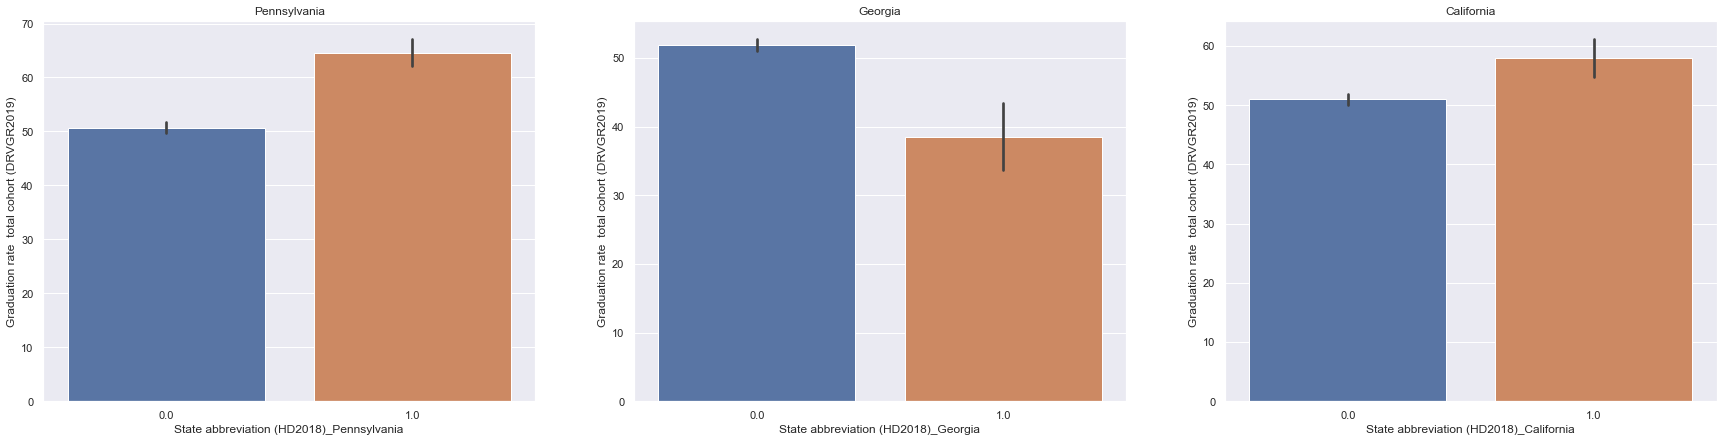

In [72]:
fig, ax = plt.subplots(1,3, figsize=(30,7))

_ = sns.barplot(data=df, x=names[-4], y=names[-1], ax=ax[0])
_ = ax[0].set_title("Pennsylvania")

_ = sns.barplot(data=df, x=names[-5], y=names[-1], ax=ax[1])
_ = ax[1].set_title("Georgia")

_ = sns.barplot(data=df, x=names[-6], y=names[-1], ax=ax[2])
_ = ax[2].set_title("California")


In [73]:
replicate_samples = cbell.sample_replicate(penn_arr, georgia_arr, cbell.diff_of_means, 10000)
ci95 = np.percentile(replicate_samples, [2.5, 97.5])
empiricle_difference = cbell.diff_of_means(penn_arr, georgia_arr)
penn_georgia_pvalue = cbell.get_p(replicate_samples, empiricle_difference, False)

In [74]:
ci95

array([-6.23009259,  6.27650463])

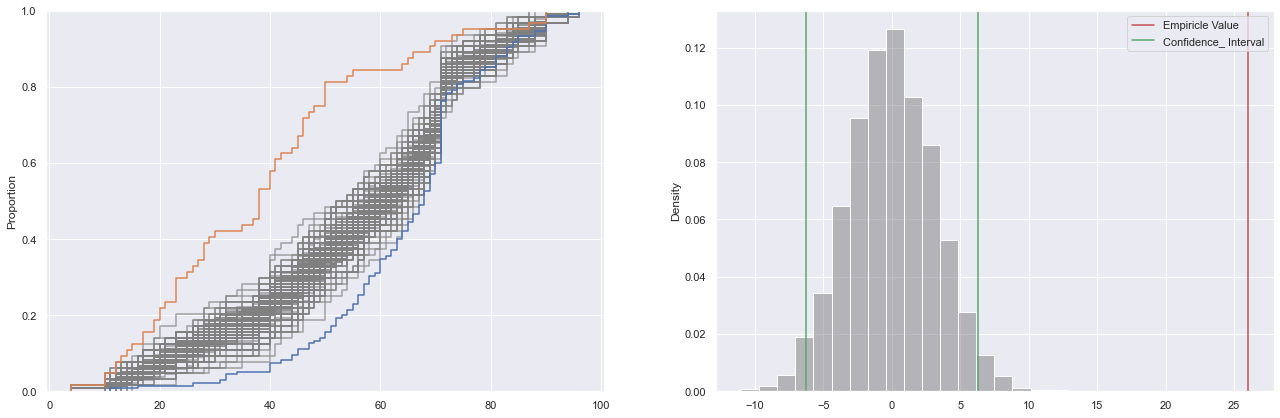

In [75]:
fig, ax = plt.subplots(1,2, figsize=(22,7))
#_ = sns.ecdfplot(x=penn_arr, label="Pennsylvania", color="gray")

cbell.plot_permutations(penn_arr, georgia_arr, 100, "Pennsylvania", "Georgia", ax=ax[0])

_ = sns.histplot(x=replicate_samples, bins=20, ax=ax[1], stat='density', color='gray',alpha=0.5)
_ = ax[1].axvline(x=empiricle_difference, color='r', label="Empiricle Value")
_ = ax[1].axvline(x=ci95[0], color='g', label="Confidence_ Interval")
_ = ax[1].axvline(x=ci95[1], color='g')
_ = ax[1].legend()
#_ = sns.ecdfplot(x=georgia_arr, label="Georgia")

### Actual Difference Between Pennsylvania and Georgia

In [76]:
empiricle_difference

26.038310185185182

### HBCU

In [69]:
hbcu = highly_important_df[highly_important_df[names[18]] == 1]
non_hbcu = highly_important_df[highly_important_df[names[18]] == 0]

hbcu_arr = hbcu[names[-1]].to_numpy()
non_arr = non_hbcu[names[-1]].to_numpy()


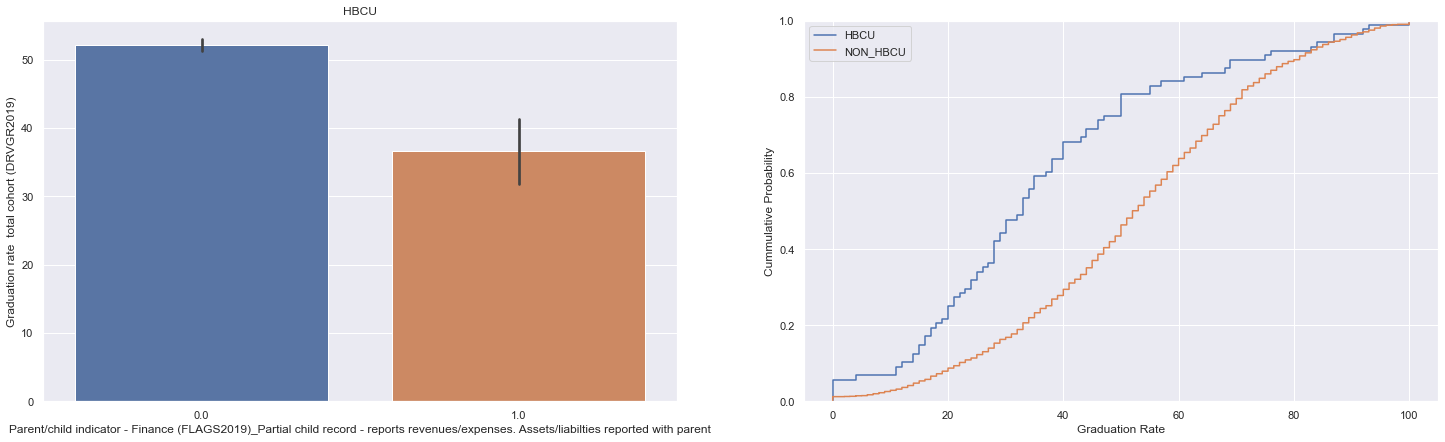

In [70]:
fig, ax = plt.subplots(1,2,figsize=(25,7))

_ = sns.barplot(data=highly_important_df, x=names[18], y=names[-1], ax=ax[0])
_ = ax[0].set_title("HBCU")

_ = sns.ecdfplot(x=hbcu_arr, label="HBCU", ax=ax[1])
plt.legend()

_ = sns.ecdfplot(x=non_arr, label="NON_HBCU", ax=ax[1])

ax[1].set_xlabel("Graduation Rate")
ax[1].set_ylabel("Cummulative Probability")
plt.legend()

plt.show()

### Feature Engineering Ideas

<ol>
    <li>Binning continuous variables</li>
    <ul>
        <li>Grant Aid</li>
        <li>Staff Diversity</li>
        <li>Expenses</li>
    </ul>
    <li>create state wranking as ordinal</li>
</ol>

In [77]:
x.columns[50:100]

Index(['Carnegie Classification 2018: Enrollment Profile (HD2018)_Exclusively undergraduate two-year',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_High undergraduate',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_Majority graduate',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_Majority undergraduate',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_Not applicable, not in Carnegie universe (not accredited or nondegree-granting)',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_Very high undergraduate',
       'Carnegie Classification 2018: Enrollment Profile (HD2018)_isMissing',
       'Carnegie Classification 2018: Size and Setting (HD2018)_Four-year, large, highly residential',
       'Carnegie Classification 2018: Size and Setting (HD2018)_Four-year, large, primarily nonresidential',
       'Carnegie Classification 2018: Size and Setting (HD2018)_Four-year, large, primarily residential